# Next Word Prediction for Aesop's Fables

In [ ]:
import tensorflow as tf
from keras.layers import LSTM, Dense, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import RMSprop
import numpy as np
import re
import random
import sys
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint

from tensorflow.random import set_seed

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preprocess the text data in order to lower each letter and discard unwanted characters
data = open('/content/drive/MyDrive/Aesop.txt', "r", encoding="utf8")
#data = open('Aesop.txt', "r", encoding="utf8")                        #for use not on Colab

# .lower() returns a version with all upper case characters replaced with lower case characters.
text = data.read().lower().strip()
data.close()

# replaces anything that is not a lowercase letter, a space, or an apostrophe with a space:
text = re.sub('[^a-z\ \',!]', " ", text)
corpus = list(text.split())
print(corpus)

['aesop', 's', 'fables', 'the', 'cock', 'and', 'the', 'pearl', 'a', 'cock', 'was', 'once', 'strutting', 'up', 'and', 'down', 'the', 'farmyard', 'among', 'the', 'hens', 'when', 'suddenly', 'he', 'espied', 'something', 'shinning', 'amid', 'the', 'straw', 'ho!', 'ho!', 'quoth', 'he,', 'that', 's', 'for', 'me,', 'and', 'soon', 'rooted', 'it', 'out', 'from', 'beneath', 'the', 'straw', 'what', 'did', 'it', 'turn', 'out', 'to', 'be', 'but', 'a', 'pearl', 'that', 'by', 'some', 'chance', 'had', 'been', 'lost', 'in', 'the', 'yard', 'you', 'may', 'be', 'a', 'treasure,', 'quoth', 'master', 'cock,', 'to', 'men', 'that', 'prize', 'you,', 'but', 'for', 'me', 'i', 'would', 'rather', 'have', 'a', 'single', 'barley', 'corn', 'than', 'a', 'peck', 'of', 'pearls', 'precious', 'things', 'are', 'for', 'those', 'that', 'can', 'prize', 'them', 'the', 'wolf', 'and', 'the', 'lamb', 'once', 'upon', 'a', 'time', 'a', 'wolf', 'was', 'lapping', 'at', 'a', 'spring', 'on', 'a', 'hillside,', 'when,', 'looking', 'up,', 

In [ ]:
#### Looking to find an ideal test set, was unsuccessful with attempts made, as all had unique symbols (words)

hindoo = """The Fox and the Cat


A Fox was boasting to a Cat of its clever devices for escaping its
enemies. “I have a whole bag of tricks,” he said, “which contains a
hundred ways of escaping my enemies.”

“I have only one,” said the Cat; “but I can generally manage with
that.” Just at that moment they heard the cry of a pack of hounds
coming towards them, and the Cat immediately scampered up a tree and
hid herself in the boughs. “This is my plan,” said the Cat. “What are
you going to do?” The Fox thought first of one way, then of another,
and while he was debating the hounds came nearer and nearer, and at
last the Fox in his confusion was caught up by the hounds and soon
killed by the huntsmen. Miss Puss, who had been looking on, said:

“Better one safe way than a hundred on which you cannot reckon.”"""

# 5 mot match hindoo = "THE SNAKE'S HEAD AND TAIL The Snake's Tail had a quarrel with the Snake's Head about who was to walk in front. The Head said: You cannot walk in front, because you have no eyes and no ears. The Tail said: Yes, but I have strength, I move you; if I want to, I can wind myself around a tree, and you cannot get off the spot. The Head said: Let us separate! And the Tail tore himself loose from the Head, and crept on; but the moment he got away from the Head, he fell into a hole and was lost."

hindoo
hindoo = hindoo.replace("'", " ")

text = hindoo.lower().strip()

# replaces anything that is not a lowercase letter, a space, or an apostrophe with a space:
text = re.sub('[^a-z\ \']+', " ", text)
corpus2 = list(text.split())
print(corpus2)

count = 0
not_in = []
for i in corpus2:
  if i not in corpus:
    count +=1
    not_in.append(i)
print(count, not_in)

['the', 'fox', 'and', 'the', 'cat', 'a', 'fox', 'was', 'boasting', 'to', 'a', 'cat', 'of', 'its', 'clever', 'devices', 'for', 'escaping', 'its', 'enemies', 'i', 'have', 'a', 'whole', 'bag', 'of', 'tricks', 'he', 'said', 'which', 'contains', 'a', 'hundred', 'ways', 'of', 'escaping', 'my', 'enemies', 'i', 'have', 'only', 'one', 'said', 'the', 'cat', 'but', 'i', 'can', 'generally', 'manage', 'with', 'that', 'just', 'at', 'that', 'moment', 'they', 'heard', 'the', 'cry', 'of', 'a', 'pack', 'of', 'hounds', 'coming', 'towards', 'them', 'and', 'the', 'cat', 'immediately', 'scampered', 'up', 'a', 'tree', 'and', 'hid', 'herself', 'in', 'the', 'boughs', 'this', 'is', 'my', 'plan', 'said', 'the', 'cat', 'what', 'are', 'you', 'going', 'to', 'do', 'the', 'fox', 'thought', 'first', 'of', 'one', 'way', 'then', 'of', 'another', 'and', 'while', 'he', 'was', 'debating', 'the', 'hounds', 'came', 'nearer', 'and', 'nearer', 'and', 'at', 'last', 'the', 'fox', 'in', 'his', 'confusion', 'was', 'caught', 'up', 

In [ ]:
# This was another way of creating the dictionaries that gave me some problems

"""
tokenizer = Tokenizer() # For those chars which are not found in word_index
tokenizer.fit_on_texts(corpus)
total_chars = len(tokenizer.word_index) + 1

print("Total number of words: ", total_chars)
print("Word: ID")
print("------------")
#print("<oov>: ", tokenizer.word_index['<oov>'])
print("And: ", tokenizer.word_index['and'])
print("Hares: ", tokenizer.word_index['hares'])
print("Frogs: ", tokenizer.word_index['frogs'])
"""


'\ntokenizer = Tokenizer() # For those chars which are not found in word_index\ntokenizer.fit_on_texts(corpus)\ntotal_chars = len(tokenizer.word_index) + 1\n\nprint("Total number of words: ", total_chars)\nprint("Word: ID")\nprint("------------")\n#print("<oov>: ", tokenizer.word_index[\'<oov>\'])\nprint("And: ", tokenizer.word_index[\'and\'])\nprint("Hares: ", tokenizer.word_index[\'hares\'])\nprint("Frogs: ", tokenizer.word_index[\'frogs\'])\n'

In [ ]:
#How many total characters do we have in our training text?
words = sorted(list(set(corpus))) #List of every character

In [ ]:
#Word sequences must be encoded as integers.
#Each unique word will be assigned an integer value.
#Create a dictionary of words mapped to integer values
word_to_int = dict((c, i) for i, c in enumerate(words))

#Do the reverse so we can print our predictions in characters and not integers
int_to_word = dict((i, c) for i, c in enumerate(words))

# summarize the data
n_words = len(corpus)
n_vocab = len(words)
print("Total Characters in the text; corpus length: ", n_words)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  11984
Total Vocab:  2313


## Choosing the Ideal Sequence Length
### Comparing for both Normal LSTM and Bidirectional LSTM

In [ ]:
# Define the checkpoint for model storing and evaluation

filepath="saved_weights/Aesop_bi/seq_len8/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

[4, 6, 8, 10, 12, 14, 16, 18, 20]
Number of sequences: 11980
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 64)             608768    
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_1 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3503 - accuracy: 0.0797
Epoch 1: loss improved from inf to 6.35032, saving model to saved_weights/Aesop_bi/seq_len8/saved_weights-01-6.3503.hdf5
94/94 [=========================

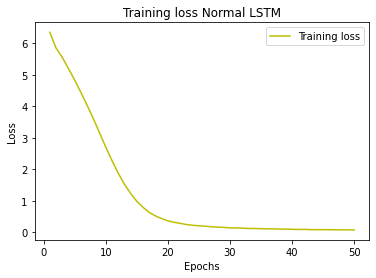

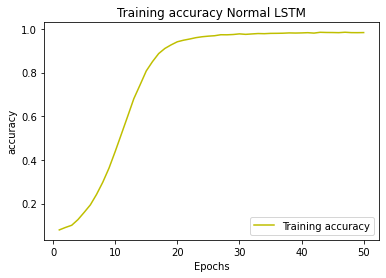

Number of sequences: 11978
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 64)             608768    
                                                                 
 lstm_5 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
93/94 [============================>.] - ETA: 0s - loss: 6.3357 - accuracy: 0.0781
Epoch 1: loss did not improve from 0.07158
94/94 [==============================] - 8s 60ms/step - loss: 6.3390 - accuracy: 0.0779
Epoch 2/50
93/94 [============================>.] - ETA:

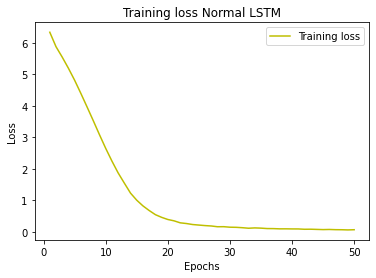

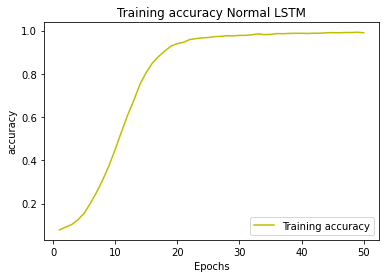

Number of sequences: 11976
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8, 64)             608768    
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dense_3 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
93/94 [============================>.] - ETA: 0s - loss: 6.3514 - accuracy: 0.0738
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 10s 74ms/step - loss: 6.3490 - accuracy: 0.0739
Epoch 2/50
94/94 [==============================] - ETA

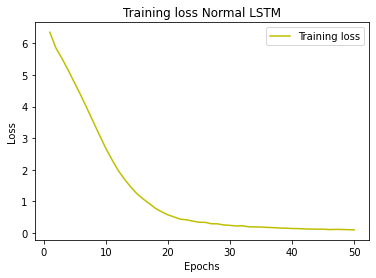

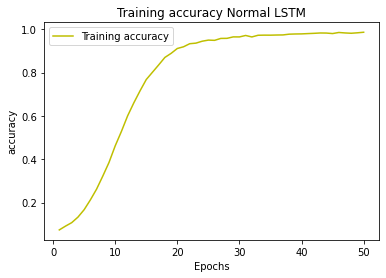

Number of sequences: 11974
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 64)            608768    
                                                                 
 lstm_9 (LSTM)               (None, 128)               98816     
                                                                 
 dense_4 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3317 - accuracy: 0.0793
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 11s 94ms/step - loss: 6.3317 - accuracy: 0.0793
Epoch 2/50
94/94 [==============================] - ETA

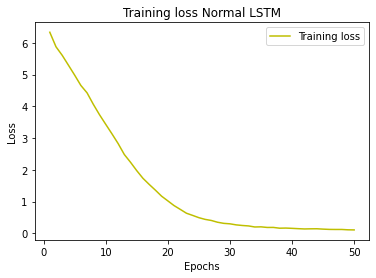

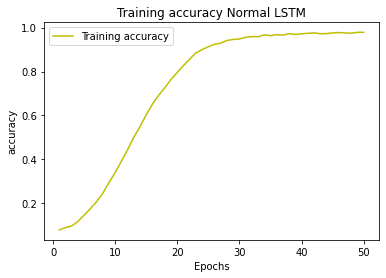

Number of sequences: 11972
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 12, 64)            608768    
                                                                 
 lstm_11 (LSTM)              (None, 128)               98816     
                                                                 
 dense_5 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3365 - accuracy: 0.0770
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 13s 110ms/step - loss: 6.3365 - accuracy: 0.0770
Epoch 2/50
94/94 [==============================] - ET

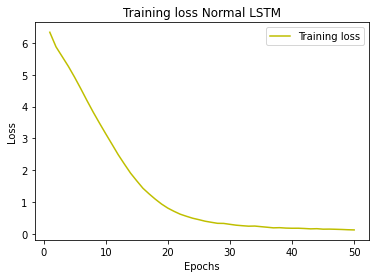

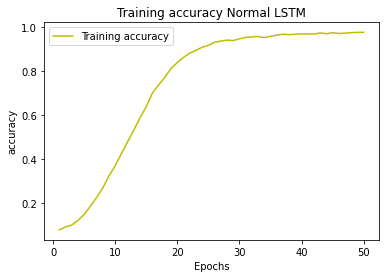

Number of sequences: 11970
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 14, 64)            608768    
                                                                 
 lstm_13 (LSTM)              (None, 128)               98816     
                                                                 
 dense_6 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3375 - accuracy: 0.0751
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 15s 122ms/step - loss: 6.3375 - accuracy: 0.0751
Epoch 2/50
94/94 [==============================] - ET

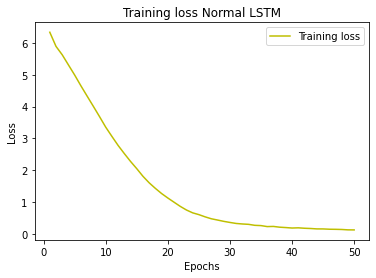

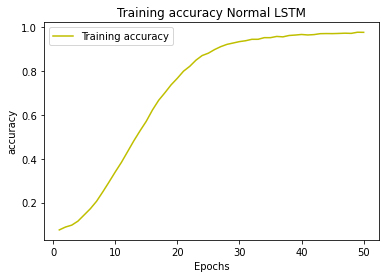

Number of sequences: 11968
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 16, 64)            608768    
                                                                 
 lstm_15 (LSTM)              (None, 128)               98816     
                                                                 
 dense_7 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3579 - accuracy: 0.0758
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 16s 140ms/step - loss: 6.3579 - accuracy: 0.0758
Epoch 2/50
94/94 [==============================] - ET

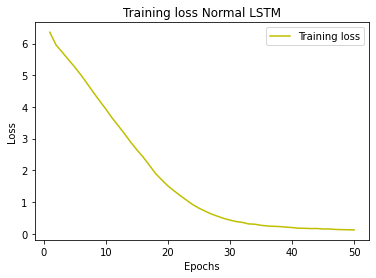

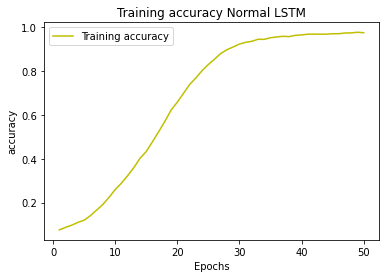

Number of sequences: 11966
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 18, 64)            608768    
                                                                 
 lstm_17 (LSTM)              (None, 128)               98816     
                                                                 
 dense_8 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3530 - accuracy: 0.0747
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 18s 153ms/step - loss: 6.3530 - accuracy: 0.0747
Epoch 2/50
94/94 [==============================] - ET

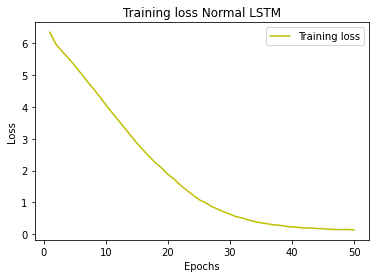

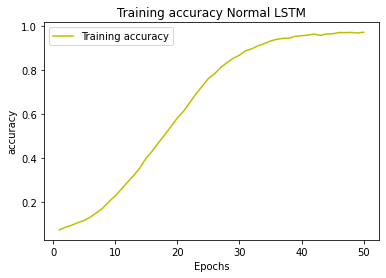

Number of sequences: 11964
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 20, 64)            608768    
                                                                 
 lstm_19 (LSTM)              (None, 128)               98816     
                                                                 
 dense_9 (Dense)             (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3539 - accuracy: 0.0765
Epoch 1: loss did not improve from 0.05543
94/94 [==============================] - 19s 170ms/step - loss: 6.3539 - accuracy: 0.0765
Epoch 2/50
94/94 [==============================] - ET

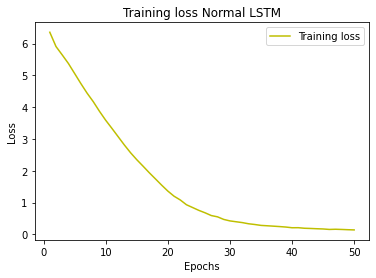

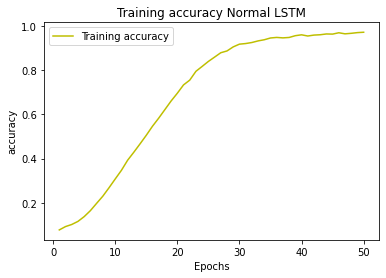

In [ ]:
# Normal

loss_history = []
accuracy_history = []


seq_lengths = [i for i in range(4,21,2)]
print(seq_lengths)

for seq_length in seq_lengths:

#seq_length = 8  # Length of each input sequence



    step = 1  # Instead of moving 1 letter at a time we can also try skipping a few.
    sentences = []    # X values (Sentences)
    next_words = []   # Y values. The word that follows the sentence defined as X
    for i in range(0, n_words - seq_length, step):  # step=1 means each sentence is offset just by a single letter
        sentences.append(corpus[i: i + seq_length])  # Sequence in
        next_words.append(corpus[i + seq_length])  # Sequence out
    n_patterns = len(sentences)
    print('Number of sequences:', n_patterns)


    x = np.zeros((len(sentences), seq_length, n_vocab), dtype=bool)
    y = np.zeros((len(sentences), n_vocab), dtype=bool)
    for i, sentence in enumerate(sentences):
        for t, word in enumerate(sentence):
            x[i, t, word_to_int[word]] = 1
        y[i, word_to_int[next_words[i]]] = 1




    # Basic model with vanilla LSTM

    model = Sequential()
    model.add(LSTM(64, input_shape=(seq_length, n_vocab), return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(n_vocab, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    model.summary()

    # Fit the model

    history = model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=callbacks_list)

    model.save(f'my_saved_weights_Aesop_{str(seq_length)}_50epochs.h5')


    loss_history.append([history.history["loss"]])

    # plot the training loss at each epoch
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.title('Training loss Normal LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    accuracy_history.append([history.history["accuracy"]])

    # plot the training accuracy at each epoch
    accuracy = history.history['accuracy']
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'y', label='Training accuracy')
    plt.title('Training accuracy Normal LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

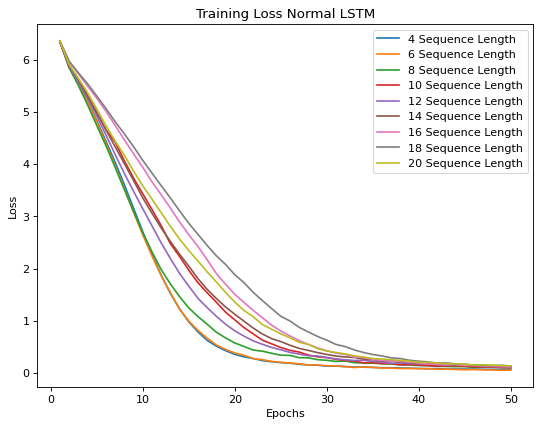

In [ ]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]


count = 0
plt.figure(figsize=(8, 6), dpi=80)
for j in range(len(loss_history)):
  for i in loss_history[j]:
    plt.plot(range(1,51), i, "y", label = f"{str(4+count)} Sequence Length", c = colors[j])
    count+=2
plt.title('Training Loss Normal LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



[4, 6, 8, 10, 12, 14, 16, 18, 20]
Number of sequences: 11980
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 4, 128)           1217536   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)            

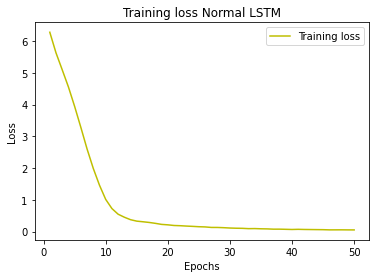

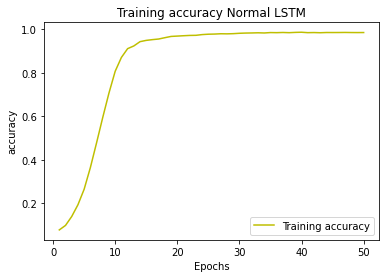

Number of sequences: 11978
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 6, 128)           1217536   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Para

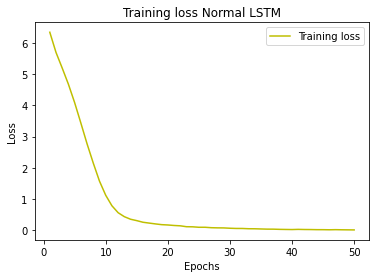

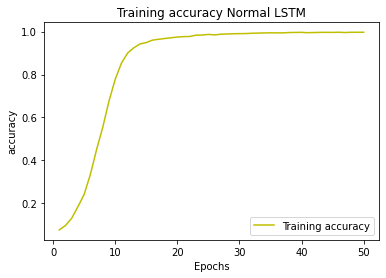

Number of sequences: 11976
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 8, 128)           1217536   
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Para

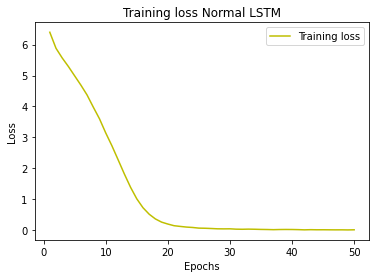

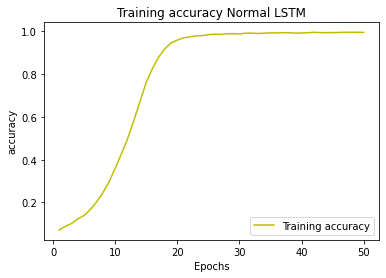

Number of sequences: 11974
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 10, 128)          1217536   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Para

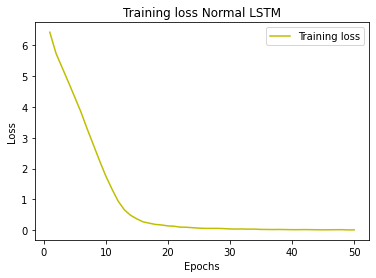

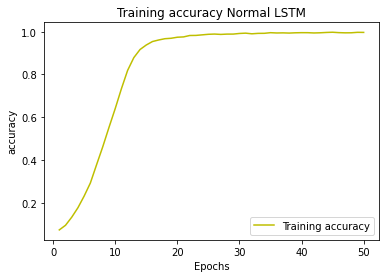

Number of sequences: 11972
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 12, 128)          1217536   
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Para

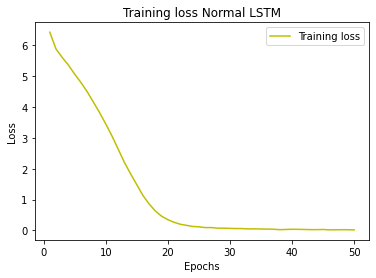

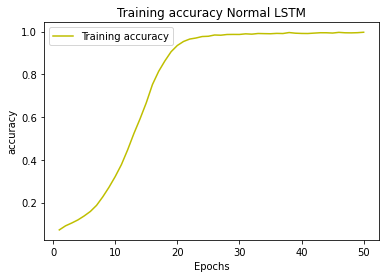

Number of sequences: 11970
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 14, 128)          1217536   
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 256)              263168    
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Para

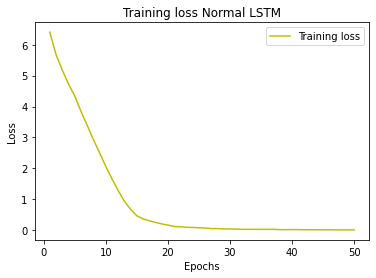

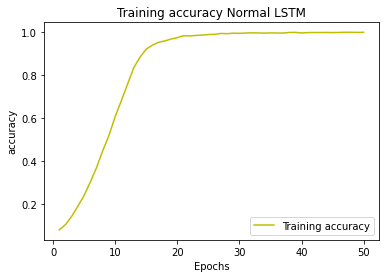

Number of sequences: 11968
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 16, 128)          1217536   
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 256)              263168    
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Para

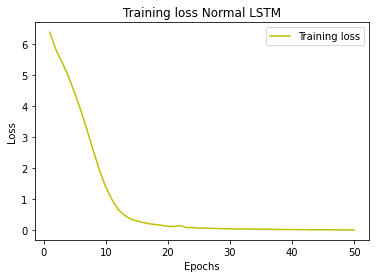

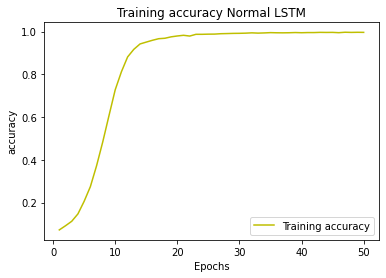

Number of sequences: 11966
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirecti  (None, 18, 128)          1217536   
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 256)              263168    
 onal)                                                           
                                                                 
 dense_17 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Para

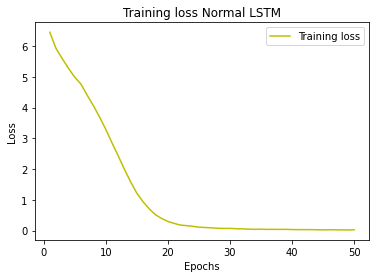

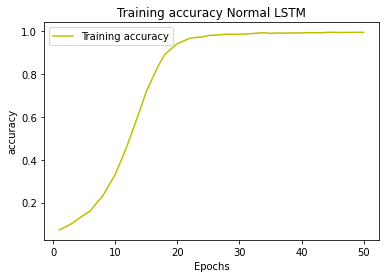

Number of sequences: 11964
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_16 (Bidirecti  (None, 20, 128)          1217536   
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 256)              263168    
 onal)                                                           
                                                                 
 dense_18 (Dense)            (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Para

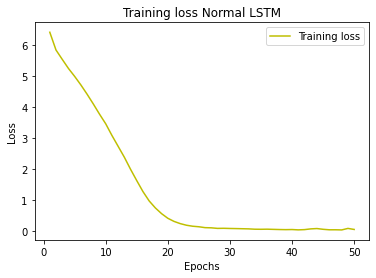

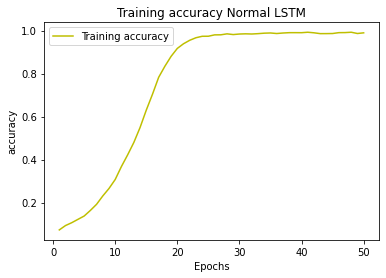

In [ ]:
#Bidirectional

loss_history2 = []
accuracy_history2 = []


seq_lengths = [i for i in range(4,21,2)]
print(seq_lengths)

for seq_length in seq_lengths:

#seq_length = 8  # Length of each input sequence



    step = 1  # Instead of moving 1 letter at a time we can also try skipping a few.
    sentences = []    # X values (Sentences)
    next_words = []   # Y values. The word that follows the sentence defined as X
    for i in range(0, n_words - seq_length, step):  # step=1 means each sentence is offset just by a single letter
        sentences.append(corpus[i: i + seq_length])  # Sequence in
        next_words.append(corpus[i + seq_length])  # Sequence out
    n_patterns = len(sentences)
    print('Number of sequences:', n_patterns)


    x = np.zeros((len(sentences), seq_length, n_vocab), dtype=bool)
    y = np.zeros((len(sentences), n_vocab), dtype=bool)
    for i, sentence in enumerate(sentences):
        for t, word in enumerate(sentence):
            x[i, t, word_to_int[word]] = 1
        y[i, word_to_int[next_words[i]]] = 1




    # Basic model with vanilla LSTM

    model = Sequential()
    #lstm = LSTM(128, input_shape=(seq_length, n_vocab))
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, n_vocab)))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(n_vocab, activation='softmax'))
    optimizer = RMSprop(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    optimizer = RMSprop(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    model.summary()

    # Fit the model

    history = model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=callbacks_list)

    model.save(f'my_saved_weights_Aesop_bi_{str(seq_length)}_50epochs.h5')


    loss_history2.append([history.history["loss"]])

    # plot the training loss at each epoch
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.title('Training loss Normal LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    accuracy_history2.append([history.history["accuracy"]])

    # plot the training accuracy at each epoch
    accuracy = history.history['accuracy']
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'y', label='Training accuracy')
    plt.title('Training accuracy Normal LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

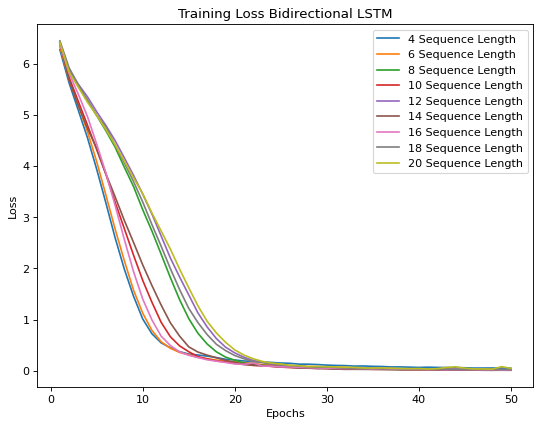

In [ ]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]


count = 0
plt.figure(figsize=(8, 6), dpi=80)
for j in range(len(loss_history2)):
  for i in loss_history2[j]:
    plt.plot(range(1,51), i, "y", label = f"{str(4+count)} Sequence Length", c = colors[j])
    count+=2
plt.title('Training Loss Bidirectional LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Applying the Chosen Length 10, to compare the response for normal LSTM and bidirection LSTM

In [ ]:
seq_length = 10  #Length of each input sequence
step = 1   #Instead of moving 1 letter at a time, try skipping a few.
sentences = []    # X values (Sentences)
next_words = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_words - seq_length, step):  # step=1 means each sentence is offset just by a single letter
    sentences.append(corpus[i: i + seq_length])  # Sequence in
    next_words.append(corpus[i + seq_length])  # Sequence out
n_patterns = len(sentences)
print('Number of sequences:', n_patterns)

Number of sequences: 11974


In [ ]:
# Example of input sequence and output


print(sentences[0])
print(next_words[0])

['aesop', 's', 'fables', 'the', 'cock', 'and', 'the', 'pearl', 'a', 'cock']
was


In [ ]:
# The input sentences and the corresponding outputs must be converted
# into a boolean array of shape=((len(sentences), seq_length, n_vocab)
# for X and shape=((len(sentences), n_vocab) for y.

x = np.zeros((len(sentences), seq_length, n_vocab), dtype=bool)
y = np.zeros((len(sentences), n_vocab), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, word in enumerate(sentence):
        x[i, t, word_to_int[word]] = 1
    y[i, word_to_int[next_words[i]]] = 1

print(x.shape)
print(y.shape)

print(y[0:10])

(11974, 10, 2313)
(11974, 2313)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
# Basic model with normal LSTM

model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, n_vocab), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            608768    
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 2313)              298377    
                                                                 
Total params: 1,005,961
Trainable params: 1,005,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=callbacks_list)

model.save('my_saved_weights_Aesop_10_50epochs.h5')

Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3782 - accuracy: 0.0739
Epoch 1: loss improved from inf to 6.37819, saving model to saved_weights/Aesop_bi/seq_len8/saved_weights-01-6.3782.hdf5
94/94 [==============================] - 17s 137ms/step - loss: 6.3782 - accuracy: 0.0739
Epoch 2/50
94/94 [==============================] - ETA: 0s - loss: 6.0161 - accuracy: 0.0843
Epoch 2: loss improved from 6.37819 to 6.01610, saving model to saved_weights/Aesop_bi/seq_len8/saved_weights-02-6.0161.hdf5
94/94 [==============================] - 20s 215ms/step - loss: 6.0161 - accuracy: 0.0843
Epoch 3/50
94/94 [==============================] - ETA: 0s - loss: 5.8062 - accuracy: 0.0925
Epoch 3: loss improved from 6.01610 to 5.80617, saving model to saved_weights/Aesop_bi/seq_len8/saved_weights-03-5.8062.hdf5
94/94 [==============================] - 20s 217ms/step - loss: 5.8062 - accuracy: 0.0925
Epoch 4/50
94/94 [==============================] - ETA: 0s - loss: 5.5904 - 

In [ ]:
# Bidirectional model

model = Sequential()
#lstm = LSTM(128, input_shape=(seq_length, n_vocab))
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, n_vocab)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(n_vocab, activation='softmax'))
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 128)          1217536   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2313)              594441    
                                                                 
Total params: 2,075,145
Trainable params: 2,075,145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model

history2 = model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=callbacks_list)

model.save('my_saved_weights_Aesop_bi_10_50epochs.h5')

Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 6.3493 - accuracy: 0.0739
Epoch 1: loss did not improve from 0.12305
94/94 [==============================] - 34s 284ms/step - loss: 6.3493 - accuracy: 0.0739
Epoch 2/50
94/94 [==============================] - ETA: 0s - loss: 5.7764 - accuracy: 0.0941
Epoch 2: loss did not improve from 0.12305
94/94 [==============================] - 25s 262ms/step - loss: 5.7764 - accuracy: 0.0941
Epoch 3/50
94/94 [==============================] - ETA: 0s - loss: 5.4277 - accuracy: 0.1133
Epoch 3: loss did not improve from 0.12305
94/94 [==============================] - 25s 263ms/step - loss: 5.4277 - accuracy: 0.1133
Epoch 4/50
94/94 [==============================] - ETA: 0s - loss: 5.0884 - accuracy: 0.1350
Epoch 4: loss did not improve from 0.12305
94/94 [==============================] - 25s 261ms/step - loss: 5.0884 - accuracy: 0.1350
Epoch 5/50
94/94 [==============================] - ETA: 0s - loss: 4.7776 - accuracy: 0.165

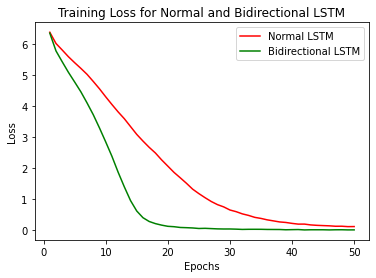

In [ ]:
loss1 = history.history["loss"]
loss2 = history2.history['loss']
epochs = range(1, len(loss1) + 1)
plt.plot(epochs, loss1, 'y', label='Normal LSTM', color = "r")
plt.plot(epochs, loss2, 'y', label='Bidirectional LSTM', color = "g")

plt.title('Training Loss for Normal and Bidirectional LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

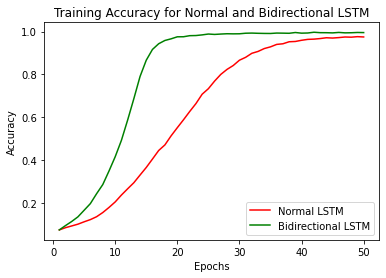

In [ ]:
accuracy1 = history.history["accuracy"]
accuracy2 = history2.history['accuracy']
epochs = range(1, len(accuracy1) + 1)
plt.plot(epochs, accuracy1, 'y', label='Normal LSTM', color = "r")
plt.plot(epochs, accuracy2, 'y', label='Bidirectional LSTM', color = "g")

plt.title('Training Accuracy for Normal and Bidirectional LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction

In [ ]:
#Generate characters
#We must provide a sequence of seq_lenth as input to start the generation process

#The prediction results is probabilities for each of the 48 characters at a specific
#point in sequence. Let us pick the one with max probability and print it out.
#Writing our own softmax function....

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
#Prediction
# load the network weights

def prediction(ucorpus):
  x_pred = np.zeros((1, seq_length, n_vocab))
  for t, word in enumerate(ucorpus):
          x_pred[0, t, word_to_int[word]] = 1.

  preds = model.predict(x_pred, verbose=0)[0]
  next_index = sample(preds)
  next_word = int_to_word[next_index]
  print(next_word)

In [ ]:
def ucorpus_maker(user_sentence):
  #print(user_sentence)
  user_sentence = user_sentence.lower().strip()
  utext = re.sub('[^a-z\ \']+', " ", user_sentence)
  ucorpus = list(utext.split())
  ucorpus = ucorpus[-seq_length:]
  #print(ucorpus)
  return ucorpus

In [ ]:
seq_length = 10
filename = "my_saved_weights_Aesop_bi_10_50epochs.h5"
model.load_weights(filename)
# write an input phrase that is automatically cut at 8 words
user_sentence = input()

no no


### FIrst prediction on chosen sentence from text

In [ ]:
user_sentence = "but surely I was right in trying to revenge him "

# The true response is "now"
ucorpus = ucorpus_maker(user_sentence)
prediction(ucorpus)

now


## Trying to shuffle the sequence

In [ ]:

for i in range(10):
  random.shuffle(ucorpus)
  print(ucorpus)
  prediction(ucorpus)


#1 correct response

['him', 'trying', 'revenge', 'to', 'but', 'surely', 'right', 'i', 'was', 'in']
a
['was', 'i', 'but', 'revenge', 'right', 'surely', 'in', 'to', 'him', 'trying']
very
['surely', 'but', 'revenge', 'was', 'him', 'i', 'to', 'in', 'trying', 'right']
to
['revenge', 'to', 'surely', 'was', 'him', 'right', 'i', 'in', 'but', 'trying']
said
['to', 'was', 'revenge', 'trying', 'surely', 'i', 'but', 'right', 'in', 'him']
thorn
['but', 'in', 'was', 'revenge', 'trying', 'right', 'surely', 'him', 'i', 'to']
know
['was', 'right', 'surely', 'but', 'i', 'him', 'trying', 'revenge', 'to', 'in']
a
['was', 'in', 'right', 'trying', 'but', 'i', 'surely', 'him', 'revenge', 'to']
hunter
['to', 'but', 'revenge', 'him', 'was', 'surely', 'i', 'in', 'trying', 'right']
now,
['was', 'to', 'in', 'but', 'him', 'i', 'surely', 'trying', 'right', 'revenge']
which


#Fixing the last word "him"

In [ ]:
ucorpus = ucorpus_maker(user_sentence)

for i in range(10):
  last_word = ucorpus.pop()
  random.shuffle(ucorpus)
  ucorpus.append(last_word)
  print(ucorpus)
  prediction(ucorpus)

#0 correct

['to', 'in', 'surely', 'but', 'right', 'was', 'trying', 'i', 'revenge', 'him']
by
['surely', 'trying', 'to', 'in', 'but', 'revenge', 'i', 'was', 'right', 'him']
he
['trying', 'revenge', 'right', 'but', 'in', 'surely', 'to', 'i', 'was', 'him']
said
['to', 'revenge', 'right', 'in', 'was', 'trying', 'but', 'i', 'surely', 'him']
very
['to', 'i', 'right', 'in', 'was', 'revenge', 'but', 'surely', 'trying', 'him']
another
['surely', 'was', 'right', 'revenge', 'trying', 'but', 'i', 'to', 'in', 'him']
said
['to', 'revenge', 'trying', 'in', 'was', 'but', 'right', 'surely', 'i', 'him']
thought
['in', 'was', 'trying', 'right', 'surely', 'to', 'i', 'but', 'revenge', 'him']
said
['was', 'trying', 'surely', 'in', 'revenge', 'to', 'right', 'i', 'but', 'him']
we
['right', 'trying', 'was', 'revenge', 'i', 'but', 'surely', 'in', 'to', 'him']
hearts


## Depends on uniqueness of the words, "him" isn't too unique, so the overall sentence was more importance.

In [ ]:
user_sentence2 = "off part of its tail. So the Serpent in revenge"

true_pred2 = "began"

ucorpus = ucorpus_maker(user_sentence2)
print("Check that it is functional")
prediction(ucorpus)
print("\n\n")

for i in range(10):
  random.shuffle(ucorpus)
  print(ucorpus)
  prediction(ucorpus)

ucorpus = ucorpus_maker(user_sentence2)
print("\n\n")

for i in range(10):
  last_word = ucorpus.pop()
  random.shuffle(ucorpus)
  ucorpus.append(last_word)
  print(ucorpus)
  prediction(ucorpus)


  #1 began when holding the last word, with a more unqiue response, none when randomising it all.

Check that it is functional
began



['in', 'its', 'tail', 'serpent', 'of', 'revenge', 'off', 'the', 'so', 'part']
and
['part', 'its', 'so', 'of', 'the', 'off', 'in', 'serpent', 'tail', 'revenge']
in
['off', 'the', 'its', 'of', 'so', 'revenge', 'tail', 'in', 'part', 'serpent']
at
['tail', 'part', 'of', 'off', 'in', 'so', 'its', 'the', 'serpent', 'revenge']
on
['revenge', 'the', 'off', 'in', 'of', 'part', 'tail', 'so', 'serpent', 'its']
jar
['in', 'serpent', 'tail', 'revenge', 'of', 'the', 'its', 'so', 'part', 'off']
his
['off', 'in', 'of', 'its', 'part', 'so', 'serpent', 'the', 'revenge', 'tail']
in
['off', 'so', 'in', 'part', 'tail', 'of', 'serpent', 'revenge', 'the', 'its']
s
['the', 'revenge', 'in', 'off', 'its', 'part', 'of', 'so', 'tail', 'serpent']
down
['part', 'its', 'so', 'off', 'serpent', 'the', 'revenge', 'in', 'tail', 'of']
a



['off', 'serpent', 'so', 'in', 'part', 'of', 'the', 'its', 'tail', 'revenge']
down
['tail', 'of', 'its', 'in', 'so', 'off', 'part', 'the', 'serpent

## Revenge is used 3 times in the whole text and the next_word of the other two are "him" and "on"

### Only 1 correct response of the word following revenge, so the words before are importance, even with a rarer inputted word. Note there is also one answer given for each "him" and "on" the words after the other revenge use in the story.


## Lets check some everyday sentence, whose symbols are all contained in the model.

In [ ]:
sentence = "the wolf and the hares were very good friends, until the wolf"
response1: "died"

ucorpus = ucorpus_maker(sentence)
prediction(ucorpus)

it


In [ ]:
sentence= "they do not know that we know they, you "
response2: "know"

ucorpus = ucorpus_maker(sentence)
prediction(ucorpus)

sentence= "they do not know that we know they, you by"
response2: "?"

ucorpus = ucorpus_maker(sentence)
prediction(ucorpus)



by
shortly


In [ ]:
sentence= "if you don't wanna wait you can do it, else i will get it"
response: "done"

ucorpus = ucorpus_maker(sentence)
prediction(ucorpus)


will


In [ ]:
random.seed(123)

sentence= "that is the hard part, coming up with"
response: "sentences"

ucorpus = ucorpus_maker(sentence)
prediction(ucorpus)


beast
